### Task 2
# UNEMPLOYMENT ANALYSIS WITH PYTHON

In [33]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [34]:
# Read the dataset from a CSV file

df = pd.read_csv('/home/vs/Downloads/Unemployment_Rate_upto_11_2020.csv')

In [35]:
# Display the first few rows of the dataset

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [36]:
# Check the information about the dataset (data types, non-null counts, etc.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [37]:
# Check for missing values in the dataset

df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [38]:
# Rename columns for better readability

df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']


In [39]:
# Convert 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [40]:
# Convert 'Frequency' column to a categorical variable

df['Frequency'] = df['Frequency'].astype('category')

In [41]:
# Extract the month from the 'Date' column and create new columns for month-related information

df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [42]:
# Convert 'Region' column to a categorical variable

df['Region'] = df['Region'].astype('category')

In [43]:
ANALYSIS# Drop the 'Month' column as it's no longer needed

df.drop(columns='Month', inplace=True)


NameError: name 'ANALYSIS' is not defined

In [44]:
# Basic Statistics

# Extract columns related to unemployment statistics

df_stats = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]


In [45]:
# Calculate and round descriptive statistics

round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [46]:
# Group data by 'Region' and calculate mean unemployment statistics

region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


In [47]:
# Create a correlation matrix for heatmap

heat_maps = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
heat_maps = heat_maps.corr()

<AxesSubplot:>

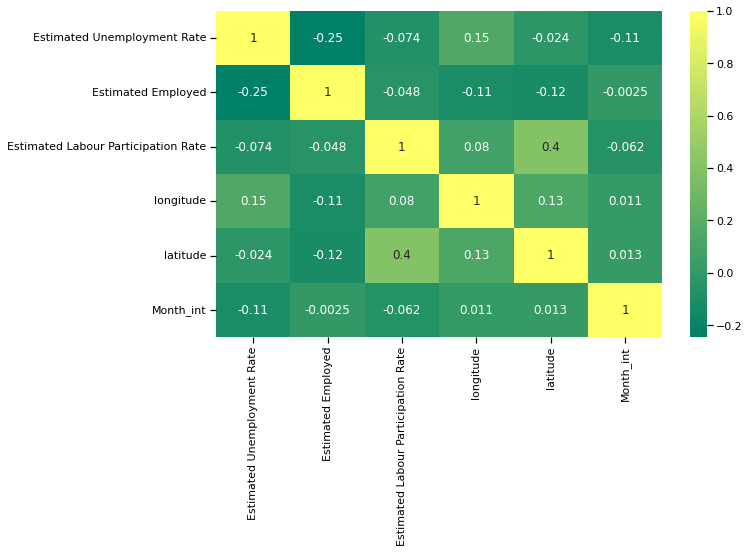

In [48]:
# Create a heatmap of correlations

plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')

In [49]:
# Create a box plot using Plotly Express

fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [18]:
# Create a scatter matrix using Plotly Express

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
                        color='Region')
fig.show()


In [19]:
# Create a bar chart of average unemployment rate by state

plot_ump = df[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [20]:
# Create an animated bar chart of unemployment rates by region and month

fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()


In [21]:
# Create a sunburst chart to visualize unemployment rates by region and state

unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

In [22]:
# Create a scatter geo map to visualize the impact of lockdown on employment across regions

fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impact of lockdown on employment across regions')


In [23]:
# Set animation frame duration

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000


In [24]:
# Update geographic axes range and appearance

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()


In [25]:
# Analyze the impact of lockdown on unemployment rates

lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

In [26]:
# Calculate the percentage change in unemployment rates

g_lock['percentage change in unemployment'] = round((g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']) / g_lock['Unemployment Rate before lockdown'], 2)


In [27]:
# Sort the data by percentage change for plotting

plot_per = g_lock.sort_values('percentage change in unemployment')

In [28]:
# Create a bar chart to visualize the percentage change in unemployment rates

fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='Percentage Change in Unemployment in Each State After Lockdown',template='ggplot2')
fig.show()

In [29]:
# Define a function to categorize states based on the impact of lockdown

def sort_impact(x):
    if x <= 10:
        return 'Impacted States'
    elif x <= 20:
        return 'Hard Impacted States'
    elif x <= 30:
        return 'Harder Impacted States'
    elif x <= 40:
        return 'Hardest Impacted States'
    return x

In [30]:
# Apply the sort_impact function to create a new column for impact status
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x: sort_impact(x))

In [31]:
# Create a bar chart to visualize the impact of lockdown on employment across states

fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of Lockdown on Employment Across States',template='ggplot2',height=650)
fig.show()